# Pointing Technique Study
### Authors: Sarah and Claudia

## Design and Procedure

We conduct a study in which we measure the task completion time of a user to click the correct circle under different conditions. For this purpose, we created an app that displays several randomly placed circles and a highlighted target that has to be clicked on.

The conditions are presented in a counter-balanced order (see Balanced Latin Squares at https://cs.uwaterloo.ca/~dmasson/tools/latin_square/):
- The user gets 20 big circles with radius 100 pixels and no distractions
- The user gets 75 small circles with radius 50 pixels and no distractions
- The user gets 20 big circles with radius 100 pixels and with color flicker of circles
- The user gets 75 small circles with radius 50 pixels and color flicker of circles
- The user gets 20 big circles with radius 100 pixels and color flicker of circles as well as background 
- The user gets 75 small circles with radius 50 pixels and color flicker of circles as well as background

All parameters, such as the radius of the circles, the number of circles, the color of the circles, the target and the background, as well as whether the condition is carried out with distractions or without, are defined in a config file (.json and .ini) which is read in through console parameters. In our test, the circles were colored black, the target red and the background orange. The color for the flicker was yellow. The previous parameters of the conditions (radius and number of circles) were set by us for the study but can be changed.

The study starts with an information text that defines the color of the target to be clicked on by the participant as soon as possible. With each condition, the participant is asked to click on five different targets which are presented in a random order. 

At the beginning of each attempt the participant has to click on a blue circle in the lower left corner of the window. This establishes a certain mouse position so that the distances and the times taken to reach the targets are comparable between the individual participants. Original intention was to assign a fixed position to the mouse cursor using QCursor.setPos (*QtGui.QCursor.setPos(self.mapToGlobal(self.rect().bottomLeft()))*), but this caused problems, so the previously described design was used. At the end of a turn, the participant is informed about having completed the task. 

__Each time the left mouse button is clicked (except clicking at blue start position), the following data is logged:__
- participant id
- pointer type
- condition
- start and end position of the mouse cursor (x-pos and y-pos)
- distance from start to end position
- number of circles
- diameter of the circles
- timestamp
- task completion time
- if a circle is clicked
- if the clicked circle is the correct target

The design of the study is within-subject, so that each participant completed each condition for both the normal and the novel pointer. In the study, a mouse was used as the pointing device. The study was performed outside a virtual machine with Manjaro, because the mouse pointer integration in the virtual environment caused trouble.

## Pointing Technique
To support the participant in performing the task and to probably reduce the task completion time, we have developed a pointing technique that attracts the mouse towards the target like a magnet.
The mouse cursoris moved to the target as soon as it has a certain distance to it.

For the calculation of the mouse movement linear interpolation is used. 

TODO

## Hypotheses
Our hypotheses are that task completion time should increase when targets are smaller, when the distance from the starting point to the target is longer and as the user is distracted by visual stimuli (color flicker). 
Furthermore the use of the novel pointer should reduce the task completion time across all conditions.

## Variables
Based on the hypotheses, the dependent variable is the task completion time measured in milliseconds via logging the left mouse button. The independent variables are the conditions (with their circle size, color and distractions) and the pointing technique (normal or novel). As control variables we document the mouse as pointing device, the window size (800 x 600 pixels), the global position of the window in the middle of the screen and the position of the mouse pointer at the bottom left hand corner of the window.

## Participants
Due to the current pandemic situation and limited time the selection of participants is limited to two female media informatics master students aged 22 and 25.They performed the experiment twice each with the normal and twice with the novel pointing technique (in a counter-balanced order). 

# Pointing Technique Analayis


## Structured Analysis
### Import all relevant libraries

In [1]:
!pip3 install pingouin

In [2]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

### All csv column names and csv items that are used more than once as variables

In [3]:
# column names
PARTICIPANT_ID = "participant_id"
CONDITION = "condition"
POINTER_TYPE = "pointer_type"
DISTANCE_TO_START_POSITION = "distance_to_start_position"

CIRCLE_COUNT = "circle_count"
CIRCLE_SIZE = "circle_size"
IS_CIRCLE_CLICKED = "is_circle_clicked"
IS_TARGET = "is_target"

TASK_COMPLETION_TIME = "task_completion_time_in_ms"

# pointer values
POINTER_NORMAL = "normal"
POINTER_NOVEL = "novel"

# labels
CONDITION_LABEL = "Condition"
POINTER_LABEL = "Pointer type"
TASK_COMPLETION_TIME_LABEL = "Task completion time [ms]"

### Read csv file

In [4]:
raw_data_1_1_normal = pd.read_csv("./1_1_normal.csv")
raw_data_1_2_novel = pd.read_csv("./1_2_novel.csv")
raw_data_2_1_novel = pd.read_csv("./2_1_novel.csv")
raw_data_2_2_normal = pd.read_csv("./2_2_normal.csv")
raw_data_3_1_novel = pd.read_csv("./3_1_novel.csv")
raw_data_3_2_normal = pd.read_csv("./3_2_normal.csv")
raw_data_4_1_normal = pd.read_csv("./4_1_normal.csv")
raw_data_4_2_novel = pd.read_csv("./4_2_novel.csv")

### Combine the individual tables of the participants and save them

In [5]:
normal_pointing_technique = pd.concat([
    raw_data_1_1_normal,
    raw_data_2_2_normal,
    raw_data_3_2_normal,
    raw_data_4_1_normal
])

novel_pointing_technique = pd.concat([
    raw_data_1_2_novel,
    raw_data_2_1_novel,
    raw_data_3_1_novel,
    raw_data_4_2_novel
])

normal_pointing_technique.to_csv("normal_pointing_technique_table.csv", index=False)
novel_pointing_technique.to_csv("novel_pointing_technique_table.csv", index=False)

In [6]:
normal_pointing_technique

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,1,normal,30,574,633,435,618.813381,20,100,True,True,849.544,2021-05-12 13:17:47.390043
1,1,1,normal,23,566,772,679,757.476072,20,100,True,True,648.232,2021-05-12 13:17:48.893758
2,1,1,normal,28,570,877,400,865.852759,20,100,True,True,1258.421,2021-05-12 13:17:51.077735
3,1,1,normal,23,572,666,211,737.407621,20,100,True,True,762.691,2021-05-12 13:17:52.733974
4,1,1,normal,18,581,893,469,882.138878,20,100,True,True,734.260,2021-05-12 13:17:54.381754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,4,6,normal,30,589,102,234,362.227829,75,50,False,False,NaN,2021-05-12 15:28:09.454948
29,4,6,normal,30,589,2577,454,2550.575229,75,50,True,True,1052.348,2021-05-12 15:28:09.782495
30,4,6,normal,35,580,2605,244,2591.871139,75,50,True,True,1104.742,2021-05-12 15:28:11.902821
31,4,6,normal,36,581,2861,504,2826.049186,75,50,True,True,797.063,2021-05-12 15:28:14.015273


In [7]:
novel_pointing_technique

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,2,novel,31,570,561,475,538.446840,75,50,True,True,624.891,2021-05-12 13:22:38.710035
1,1,2,novel,21,570,832,545,811.385235,75,50,True,True,805.304,2021-05-12 13:22:40.760116
2,1,2,novel,30,577,821,448,801.449936,75,50,True,True,909.796,2021-05-12 13:22:42.702029
3,1,2,novel,24,586,629,281,677.532287,75,50,True,True,1256.515,2021-05-12 13:22:45.056019
4,1,2,novel,16,568,686,736,690.741630,75,50,True,True,1067.809,2021-05-12 13:22:47.318038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,4,5,novel,14,572,2758,432,2747.569107,20,100,True,True,603.610,2021-05-12 15:30:39.479735
27,4,5,novel,7,570,2859,677,2854.006482,20,100,True,True,566.721,2021-05-12 15:30:40.930025
28,4,5,novel,44,570,2804,197,2785.090483,20,100,True,True,1204.122,2021-05-12 15:30:43.119761
29,4,5,novel,28,574,3041,468,3014.864010,20,100,True,True,1261.807,2021-05-12 15:30:46.223883


In [8]:
# whole data set
pointing_technique_table = pd.concat([
    normal_pointing_technique,
    novel_pointing_technique
])

pointing_technique_table

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,1,normal,30,574,633,435,618.813381,20,100,True,True,849.544,2021-05-12 13:17:47.390043
1,1,1,normal,23,566,772,679,757.476072,20,100,True,True,648.232,2021-05-12 13:17:48.893758
2,1,1,normal,28,570,877,400,865.852759,20,100,True,True,1258.421,2021-05-12 13:17:51.077735
3,1,1,normal,23,572,666,211,737.407621,20,100,True,True,762.691,2021-05-12 13:17:52.733974
4,1,1,normal,18,581,893,469,882.138878,20,100,True,True,734.260,2021-05-12 13:17:54.381754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,4,5,novel,14,572,2758,432,2747.569107,20,100,True,True,603.610,2021-05-12 15:30:39.479735
27,4,5,novel,7,570,2859,677,2854.006482,20,100,True,True,566.721,2021-05-12 15:30:40.930025
28,4,5,novel,44,570,2804,197,2785.090483,20,100,True,True,1204.122,2021-05-12 15:30:43.119761
29,4,5,novel,28,574,3041,468,3014.864010,20,100,True,True,1261.807,2021-05-12 15:30:46.223883


### Filter the data with relevant columns for analysis of task completion time and save the result

In [9]:
filtered_data = pointing_technique_table[
    [PARTICIPANT_ID, CONDITION, POINTER_TYPE, DISTANCE_TO_START_POSITION, IS_CIRCLE_CLICKED, IS_TARGET, TASK_COMPLETION_TIME]]

filtered_data.to_csv("filtered_data.csv", index=False)

filtered_data

,participant_id,condition,pointer_type,distance_to_start_position,is_circle_clicked,is_target,task_completion_time_in_ms
0,1,1,normal,618.813381,True,True,849.544
1,1,1,normal,757.476072,True,True,648.232
2,1,1,normal,865.852759,True,True,1258.421
3,1,1,normal,737.407621,True,True,762.691
4,1,1,normal,882.138878,True,True,734.260
...,...,...,...,...,...,...,...
26,4,5,novel,2747.569107,True,True,603.610
27,4,5,novel,2854.006482,True,True,566.721
28,4,5,novel,2785.090483,True,True,1204.122
29,4,5,novel,3014.864010,True,True,1261.807


### Filter the data to include only the response times where the user clicked the correct target

In [10]:
correct_clicks = filtered_data[filtered_data[IS_TARGET]]
correct_clicks = correct_clicks[
    [PARTICIPANT_ID, CONDITION, POINTER_TYPE, DISTANCE_TO_START_POSITION, TASK_COMPLETION_TIME]]

correct_clicks.to_csv("correct_clicks.csv", index=False)
correct_clicks

,participant_id,condition,pointer_type,distance_to_start_position,task_completion_time_in_ms
0,1,1,normal,618.813381,849.544
1,1,1,normal,757.476072,648.232
2,1,1,normal,865.852759,1258.421
3,1,1,normal,737.407621,762.691
4,1,1,normal,882.138878,734.260
...,...,...,...,...,...
26,4,5,novel,2747.569107,603.610
27,4,5,novel,2854.006482,566.721
28,4,5,novel,2785.090483,1204.122
29,4,5,novel,3014.864010,1261.807


## Statistics for all tables

In [53]:
pointing_technique_table.describe() # total

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,240.000000
mean,2.509881,3.505929,25.810277,574.758893,1673.391304,484.027668,1668.252205,47.826087,74.703557,859.913650
std,1.121976,1.708105,9.240373,8.454428,1057.197351,159.696846,1040.277119,27.552572,25.047793,309.680643
min,1.000000,1.000000,3.000000,551.000000,16.000000,10.000000,1.000000,20.000000,50.000000,380.813000
25%,2.000000,2.000000,19.000000,570.000000,693.000000,384.000000,695.174798,20.000000,50.000000,667.102750
50%,3.000000,4.000000,27.000000,574.000000,885.000000,479.000000,878.275583,75.000000,50.000000,783.800500
75%,4.000000,5.000000,32.000000,581.000000,2766.000000,564.000000,2747.569107,75.000000,100.000000,1021.378500
max,4.000000,6.000000,49.000000,598.000000,3066.000000,839.000000,3034.218186,75.000000,100.000000,2963.183000


In [61]:
pointing_technique_table[pointing_technique_table[CONDITION] == 1].describe() # total for condition 1

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.0,40.000000
mean,2.500000,1.0,27.023810,572.214286,1690.761905,505.238095,1676.430773,20.0,100.0,751.231300
std,1.109823,0.0,8.431903,7.980267,1068.118583,151.538099,1060.654978,0.0,0.0,201.074733
min,1.000000,1.0,7.000000,559.000000,172.000000,211.000000,164.684547,20.0,100.0,428.725000
25%,2.000000,1.0,23.000000,566.500000,709.500000,408.750000,723.700344,20.0,100.0,583.537000
50%,2.500000,1.0,28.000000,571.500000,893.000000,495.500000,880.207231,20.0,100.0,727.770500
75%,3.000000,1.0,32.750000,576.750000,2766.500000,561.000000,2752.612747,20.0,100.0,860.592000
max,4.000000,1.0,41.000000,590.000000,3034.000000,814.000000,3003.103228,20.0,100.0,1258.421000


In [62]:
pointing_technique_table[pointing_technique_table[CONDITION] == 2].describe() # total for condition 2

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.0,40.00000
mean,2.463415,2.0,25.609756,573.878049,1707.439024,468.780488,1700.027441,75.0,50.0,869.50140
std,1.142313,0.0,8.941135,8.316234,1048.480020,155.637963,1036.198734,0.0,0.0,224.46228
min,1.000000,2.0,4.000000,551.000000,313.000000,180.000000,400.711867,75.0,50.0,391.64800
25%,1.000000,2.0,19.000000,570.000000,696.000000,363.000000,697.000000,75.0,50.0,728.74875
50%,2.000000,2.0,28.000000,574.000000,873.000000,468.000000,875.822471,75.0,50.0,804.24400
75%,3.000000,2.0,32.000000,581.000000,2761.000000,545.000000,2728.992671,75.0,50.0,1059.95950
max,4.000000,2.0,38.000000,588.000000,3026.000000,778.000000,3019.155511,75.0,50.0,1338.83200


In [63]:
pointing_technique_table[pointing_technique_table[CONDITION] == 3].describe() # total for condition 3

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.0,40.000000
mean,2.511628,3.0,28.232558,575.046512,1655.418605,511.488372,1640.047804,20.0,100.0,791.969475
std,1.141680,0.0,9.344816,6.484243,1077.913819,153.140983,1070.198664,0.0,0.0,272.988222
min,1.000000,3.0,6.000000,559.000000,31.000000,205.000000,29.274562,20.0,100.0,380.813000
25%,1.500000,3.0,24.000000,570.500000,691.500000,424.000000,685.371366,20.0,100.0,619.976250
50%,3.000000,3.0,27.000000,576.000000,887.000000,502.000000,887.854155,20.0,100.0,707.542500
75%,3.500000,3.0,34.000000,579.000000,2769.000000,581.000000,2737.503406,20.0,100.0,901.431250
max,4.000000,3.0,47.000000,586.000000,3066.000000,838.000000,3034.218186,20.0,100.0,1614.827000


In [64]:
pointing_technique_table[pointing_technique_table[CONDITION] == 4].describe() # total for condition 4

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,44.000000,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.0,40.000000
mean,2.590909,4.0,23.363636,573.727273,1600.250000,445.909091,1618.672896,75.0,50.0,997.492475
std,1.127215,0.0,9.477245,9.344476,1084.593443,176.532337,1042.956792,0.0,0.0,349.880911
min,1.000000,4.0,4.000000,559.000000,28.000000,10.000000,379.131903,75.0,50.0,546.429000
25%,2.000000,4.0,17.750000,566.000000,650.000000,311.250000,674.136559,75.0,50.0,736.353500
50%,3.000000,4.0,22.000000,573.000000,868.000000,452.500000,856.315420,75.0,50.0,914.305000
75%,4.000000,4.0,31.250000,581.000000,2749.000000,533.250000,2739.098457,75.0,50.0,1141.405500
max,4.000000,4.0,43.000000,596.000000,3028.000000,771.000000,3005.812536,75.0,50.0,2318.069000


In [65]:
pointing_technique_table[pointing_technique_table[CONDITION] == 5].describe() # total for condition 5

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,40.000000,40.0,40.00000,40.000000,40.000000,40.00000,40.000000,40.0,40.0,40.000000
mean,2.500000,5.0,26.52500,576.825000,1764.275000,506.90000,1750.696264,20.0,100.0,761.071375
std,1.132277,0.0,8.99569,8.825626,1037.096687,157.29065,1028.149179,0.0,0.0,266.870269
min,1.000000,5.0,7.00000,558.000000,612.000000,197.00000,597.596854,20.0,100.0,438.721000
25%,1.750000,5.0,21.75000,570.750000,720.250000,413.00000,731.404754,20.0,100.0,580.837500
50%,2.500000,5.0,27.00000,575.500000,1730.000000,483.50000,1717.714322,20.0,100.0,697.699000
75%,3.250000,5.0,31.25000,582.750000,2786.750000,580.75000,2759.632202,20.0,100.0,814.451250
max,4.000000,5.0,46.00000,598.000000,3041.000000,839.00000,3014.864010,20.0,100.0,1520.017000


In [66]:
pointing_technique_table[pointing_technique_table[CONDITION] == 6].describe() # total for condition 6

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.0,40.000000
mean,2.488372,6.0,24.232558,576.930233,1632.232558,468.116279,1632.211084,75.0,50.0,988.215875
std,1.141680,0.0,9.773232,8.929340,1078.591582,159.600276,1058.047179,0.0,0.0,406.784364
min,1.000000,6.0,3.000000,551.000000,16.000000,185.000000,1.000000,75.0,50.0,434.671000
25%,1.500000,6.0,16.500000,571.500000,675.000000,356.500000,681.783638,75.0,50.0,792.556500
50%,2.000000,6.0,26.000000,579.000000,883.000000,461.000000,866.065240,75.0,50.0,907.148000
75%,3.500000,6.0,30.500000,582.000000,2752.000000,542.500000,2730.799763,75.0,50.0,1093.163500
max,4.000000,6.0,49.000000,594.000000,3005.000000,792.000000,3001.567091,75.0,50.0,2963.183000


In [54]:
normal_pointing_technique.describe() # normal pointing technique

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,120.000000
mean,2.531746,3.500000,24.079365,576.206349,1653.904762,482.674603,1653.338180,48.373016,74.206349,835.176633
std,1.129152,1.709971,8.778704,7.864164,1018.691250,161.631177,997.234583,27.595865,25.087150,237.249824
min,1.000000,1.000000,5.000000,559.000000,28.000000,184.000000,164.684547,20.000000,50.000000,478.201000
25%,2.000000,2.000000,18.000000,570.250000,700.750000,371.000000,723.947242,20.000000,50.000000,672.229750
50%,3.000000,4.000000,25.000000,576.000000,892.500000,480.000000,893.197058,75.000000,50.000000,763.131500
75%,4.000000,5.000000,30.000000,582.000000,2687.500000,566.250000,2669.404152,75.000000,100.000000,987.037750
max,4.000000,6.000000,46.000000,596.000000,2904.000000,839.000000,2886.923103,75.000000,100.000000,1722.055000


In [55]:
novel_pointing_technique.describe() # novel pointing technique

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,120.000000
mean,2.488189,3.511811,27.527559,573.322835,1692.724409,485.370079,1683.048796,47.283465,75.196850,884.650667
std,1.118858,1.713004,9.399280,8.799244,1097.761414,158.383140,1085.046416,27.608055,25.098232,367.543872
min,1.000000,1.000000,3.000000,551.000000,16.000000,10.000000,1.000000,20.000000,50.000000,380.813000
25%,1.500000,2.000000,21.000000,568.000000,684.500000,391.000000,676.463123,20.000000,50.000000,653.892000
50%,2.000000,3.000000,28.000000,573.000000,871.000000,479.000000,845.236653,20.000000,100.000000,803.350500
75%,3.000000,5.000000,34.000000,579.500000,2802.500000,563.500000,2792.687474,75.000000,100.000000,1068.201750
max,4.000000,6.000000,49.000000,598.000000,3066.000000,790.000000,3034.218186,75.000000,100.000000,2963.183000


In [56]:
correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL].describe() # correct clicks for normal

,participant_id,condition,distance_to_start_position,task_completion_time_in_ms
count,120.000000,120.000000,120.000000,120.000000
mean,2.500000,3.500000,1717.177607,835.176633
std,1.122722,1.714986,978.641804,237.249824
min,1.000000,1.000000,554.033392,478.201000
25%,1.750000,2.000000,747.989478,672.229750
50%,2.500000,3.500000,1704.553655,763.131500
75%,3.250000,5.000000,2683.796338,987.037750
max,4.000000,6.000000,2886.923103,1722.055000


In [57]:
correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL].describe() # correct clicks for normal

,participant_id,condition,distance_to_start_position,task_completion_time_in_ms
count,120.000000,120.000000,120.000000,120.000000
mean,2.500000,3.500000,1765.349101,884.650667
std,1.122722,1.714986,1057.894206,367.543872
min,1.000000,1.000000,538.446840,380.813000
25%,1.750000,2.000000,690.624506,653.892000
50%,2.500000,3.500000,1724.681719,803.350500
75%,3.250000,5.000000,2806.863566,1068.201750
max,4.000000,6.000000,3034.218186,2963.183000


## Visualizations
appropriate visualizations that indicate absolute and relative pointing performance (task completion times, errors) of pointing
technique and standard pointer behavior and of individual participants

### Scatter plots for task completion time

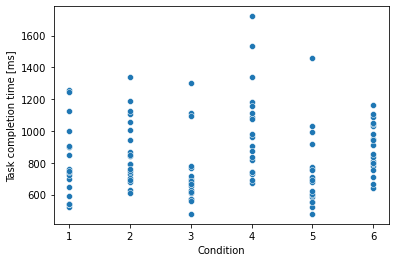

In [16]:
scatter_plot_normal_con = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
)
scatter_plot_normal_con.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

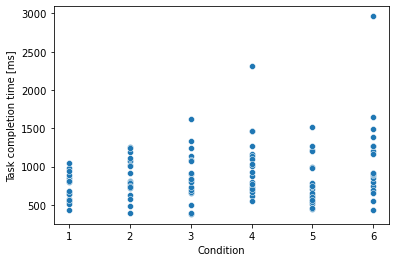

In [17]:
scatter_plot_novel_con = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
)
scatter_plot_novel_con.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

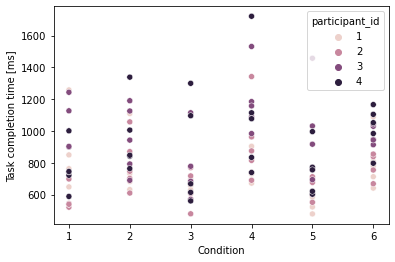

In [18]:
scatter_plot_normal_ids = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
    hue = PARTICIPANT_ID,
)
scatter_plot_normal_ids.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

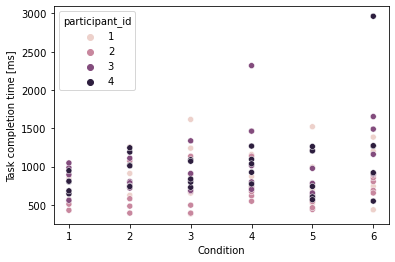

In [19]:
scatter_plot_novel_ids = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
    hue = PARTICIPANT_ID,
)
scatter_plot_novel_ids.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

### Scatter plots for distance

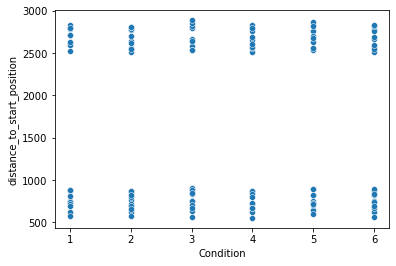

In [70]:
scatter_plot_normal_con_dis = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = DISTANCE_TO_START_POSITION,
)
scatter_plot_normal_con_dis.set(xlabel = CONDITION_LABEL, ylabel = DISTANCE_TO_START_POSITION)
plt.show()

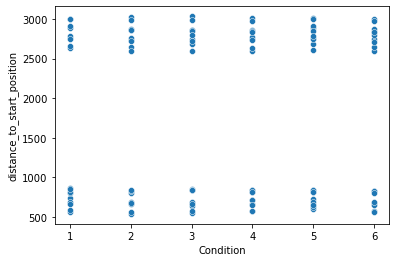

In [71]:
scatter_plot_novel_con_dis = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = DISTANCE_TO_START_POSITION,
)
scatter_plot_novel_con_dis.set(xlabel = CONDITION_LABEL, ylabel = DISTANCE_TO_START_POSITION)
plt.show()

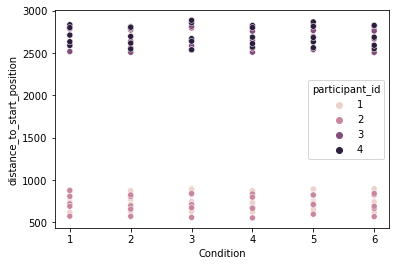

In [72]:
scatter_plot_normal_ids_dis = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = DISTANCE_TO_START_POSITION,
    hue = PARTICIPANT_ID,
)
scatter_plot_normal_ids_dis.set(xlabel = CONDITION_LABEL, ylabel = DISTANCE_TO_START_POSITION)
plt.show()

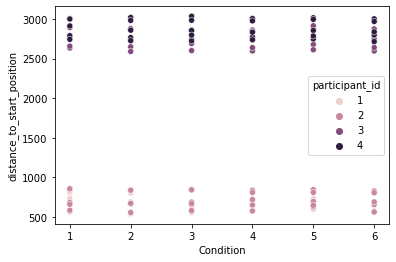

In [73]:
scatter_plot_novel_ids_dis = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = DISTANCE_TO_START_POSITION,
    hue = PARTICIPANT_ID,
)
scatter_plot_novel_ids_dis.set(xlabel = CONDITION_LABEL, ylabel = DISTANCE_TO_START_POSITION)
plt.show()

### Swarm plots for task completion time

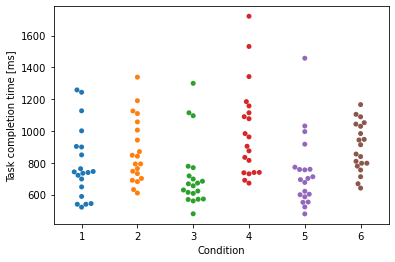

In [75]:
swarm_plot_con_normal = sns.swarmplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    y = TASK_COMPLETION_TIME,
    x = CONDITION,
)
swarm_plot_con_normal.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

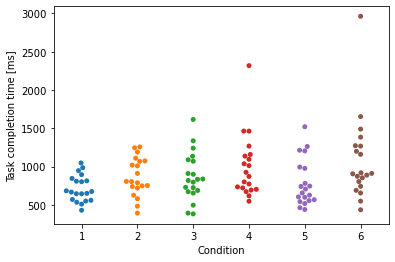

In [78]:
swarm_plot_con_novel = sns.swarmplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    y = TASK_COMPLETION_TIME,
    x = CONDITION,
)
swarm_plot_con_novel.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

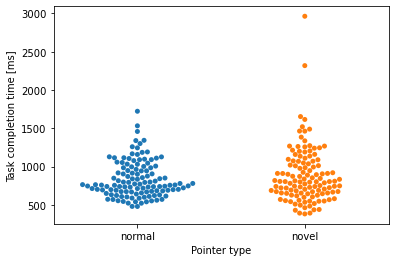

In [79]:
swarm_plot_pointer = sns.swarmplot(
    data = correct_clicks,
    y = TASK_COMPLETION_TIME,
    x = POINTER_TYPE,
)
swarm_plot_pointer.set(xlabel = POINTER_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

### Swarm plots for distance

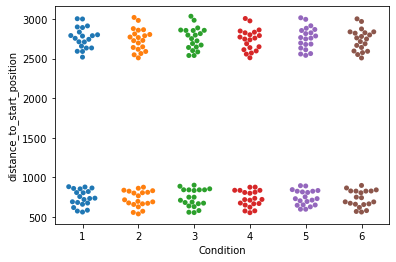

In [77]:
swarm_plot_con_normal_dis = sns.swarmplot(
    data = correct_clicks,
    y = DISTANCE_TO_START_POSITION,
    x = CONDITION,
)
swarm_plot_con_normal_dis.set(xlabel = CONDITION_LABEL, ylabel = DISTANCE_TO_START_POSITION)

plt.show()

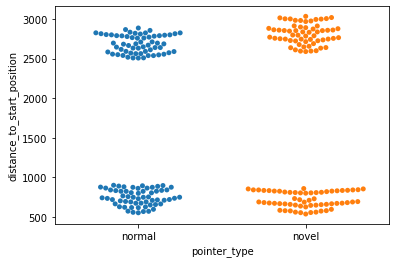

In [80]:
swarm_plot_pointer_dis = sns.swarmplot(
    data = correct_clicks,
    y = DISTANCE_TO_START_POSITION,
    x = POINTER_TYPE,
)
swarm_plot_pointer.set(xlabel = POINTER_LABEL, ylabel = DISTANCE_TO_START_POSITION)

plt.show()

### Boxplots for task completion time

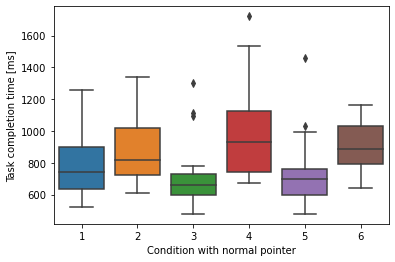

In [82]:
box_plot_con_normal = sns.boxplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME
)

box_plot_con_normal.set(xlabel = CONDITION_LABEL + " with normal pointer", ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

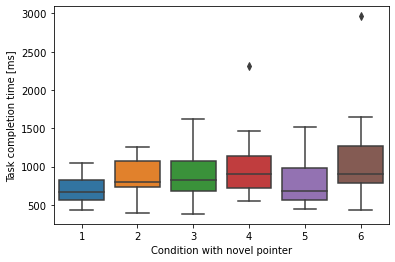

In [106]:
box_plot_con_novel = sns.boxplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME
)

box_plot_con_novel.set(xlabel = CONDITION_LABEL + " with novel pointer", ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

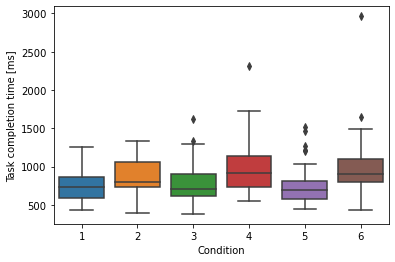

In [107]:
box_plot_con = sns.boxplot(
    data = correct_clicks,
    x = CONDITION,
    y = TASK_COMPLETION_TIME
)

box_plot_con.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

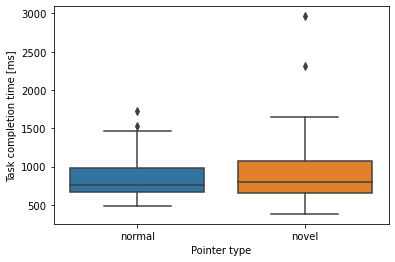

In [88]:
box_plot_pointer = sns.boxplot(
    data = correct_clicks,
    x = POINTER_TYPE,
    y = TASK_COMPLETION_TIME
)

box_plot_pointer.set(xlabel = POINTER_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

### Boxplots for distance

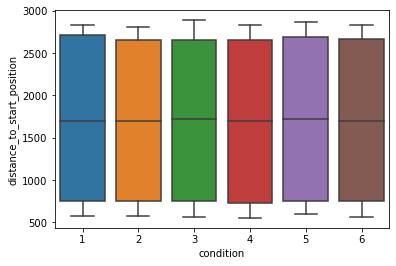

In [103]:
box_plot_con_normal_dis = sns.boxplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = DISTANCE_TO_START_POSITION
)

box_plot_con_normal.set(xlabel = CONDITION_LABEL + " with normal pointer", ylabel = DISTANCE_TO_START_POSITION)
plt.show()

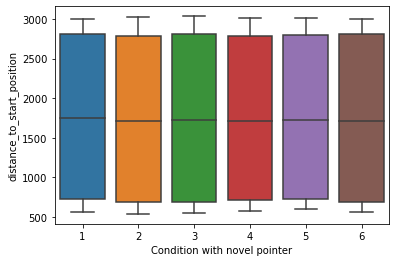

In [102]:
box_plot_con_novel_dis = sns.boxplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = DISTANCE_TO_START_POSITION
)

box_plot_con_novel_dis.set(xlabel = CONDITION_LABEL + " with novel pointer", ylabel = DISTANCE_TO_START_POSITION)
plt.show()

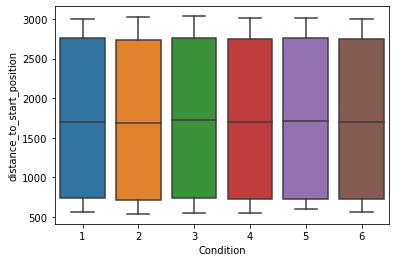

In [105]:
box_plot_con_dis = sns.boxplot(
    data = correct_clicks,
    x = CONDITION,
    y = DISTANCE_TO_START_POSITION
)

box_plot_con_dis.set(xlabel = CONDITION_LABEL, ylabel = DISTANCE_TO_START_POSITION)
plt.show()

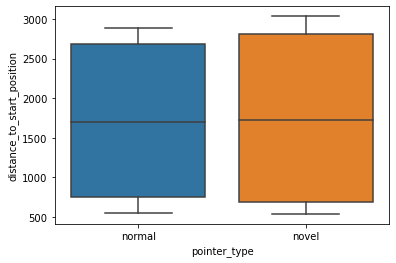

In [89]:
box_plot_pointer_dis = sns.boxplot(
    data = correct_clicks,
    x = POINTER_TYPE,
    y = DISTANCE_TO_START_POSITION
)

box_plot_pointer.set(xlabel = POINTER_LABEL, ylabel = DISTANCE_TO_START_POSITION)
plt.show()

## T-test

__Tests for variance homogeneity and normal distribution__

In [90]:
pg.homoscedasticity(data = correct_clicks, dv = TASK_COMPLETION_TIME, group = POINTER_TYPE, method = "bartlett")

,T,pval,equal_var
bartlett,22.015714,0.000003,False


In [91]:
pg.normality(data = correct_clicks, dv = TASK_COMPLETION_TIME, group = POINTER_TYPE)

,W,pval,normal
normal,0.926846,6.149554e-06,False
novel,0.841704,5.251060e-10,False


In [96]:
pg.homoscedasticity(data = correct_clicks, dv = TASK_COMPLETION_TIME, group = CONDITION, method = "bartlett")

,T,pval,equal_var
bartlett,27.460478,0.000046,False


In [97]:
pg.normality(data = correct_clicks, dv = TASK_COMPLETION_TIME, group = CONDITION)

,W,pval,normal
1,0.941028,3.745525e-02,False
2,0.972100,4.184172e-01,True
3,0.910368,3.883694e-03,False
4,0.862241,1.808913e-04,False
5,0.856934,1.331520e-04,False
6,0.728202,2.917912e-07,False


In [92]:
pg.homoscedasticity(data = correct_clicks, dv = DISTANCE_TO_START_POSITION, group = POINTER_TYPE, method = "bartlett")

,T,pval,equal_var
bartlett,0.717839,0.396854,True


In [94]:
pg.normality(data = correct_clicks, dv = DISTANCE_TO_START_POSITION, group = POINTER_TYPE)

,W,pval,normal
normal,0.732513,1.707713e-13,False
novel,0.730007,1.462461e-13,False


In [98]:
pg.homoscedasticity(data = correct_clicks, dv = DISTANCE_TO_START_POSITION, group = CONDITION, method = "bartlett")

,T,pval,equal_var
bartlett,0.002806,1.0,True


In [99]:
pg.normality(data = correct_clicks, dv = DISTANCE_TO_START_POSITION, group = CONDITION)

,W,pval,normal
1,0.739031,4.530241e-07,False
2,0.741851,5.089429e-07,False
3,0.743816,5.521742e-07,False
4,0.738659,4.461467e-07,False
5,0.735954,3.993552e-07,False
6,0.739386,4.596916e-07,False


No normal distribution for all, therefore use of Welch-Anova test

In [108]:
pg.welch_anova(data = correct_clicks, dv = TASK_COMPLETION_TIME, between = POINTER_TYPE)

,Source,ddof1,ddof2,F,p-unc,np2
0,pointer_type,1,203.497681,1.534788,0.216822,0.006407


In [109]:
pg.welch_anova(data = correct_clicks, dv = DISTANCE_TO_START_POSITION, between = POINTER_TYPE)

,Source,ddof1,ddof2,F,p-unc,np2
0,pointer_type,1,236.571276,0.134076,0.71457,0.000563


In [100]:
pg.welch_anova(data = correct_clicks, dv = TASK_COMPLETION_TIME, between = CONDITION)

,Source,ddof1,ddof2,F,p-unc,np2
0,condition,5,108.339494,5.07366,0.000323,0.10764


In [101]:
pg.welch_anova(data = correct_clicks, dv = DISTANCE_TO_START_POSITION, between = CONDITION)

,Source,ddof1,ddof2,F,p-unc,np2
0,condition,5,109.199894,0.002905,0.999999,0.000064


## Results
In each condition, the distance from start to finish is nearly the same for all of them. However, the task completion times are very different. Condition four has the highest average time of 997.49 (SD = 349.88) and condition one the lowest (M = 751.23, SD = 201.07).
Conditions one, two and six show no outliers in the boxplot; the others have a high distribution. 

Comparing the two pointing techniques, they have about the same average distance from start to finish (normal: M = 1653.34, SD = 997.23; novel: M = 1683.05, SD = 1085.05), with a slightly higher standard deviation for "novel". The average task completion time is almost the same for both (normal: M = 835.18, SD = 237.25; novel: M = 884.65, SD = 367.54). The boxplot shows two outliers for both, whereby the deviation is higher for "novel". 


A Welch-Anova-test show that the differences for the task completion time between the two pointing techniques are not significant (t(1) = 1.53, p = 0.22). Also the differneces for the distance from start to finish is not significant (t(1) = 0.13, p = 0.71). In other words, with both pointing techniques, the speed is about the same and the distance to the target is about the same.

Considering the differences in task completion time between conditions, they are significant (t(5) = 5.07, p < 0.001) with medium effects ($\eta²$ = 0.11) according to Cohen (2013). The differences between conditions in terms of distance to target are not significant (t(5) = 0.00, p = 1).

This implies that there are medium differences regarding the task completion time between conditions, but no differences recarding to the distance from start to finish.


__Source:__ Cohen, J. (2013). Statistical power analysis for the behavioral sciences. Academic press.

## Discussion
